In [1]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import LongTraceSimulator
import matplotlib.pyplot as plt
from OptimumFilter import *
def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict
sampling_frequency = 3906250
vac_template = np.load("templates/vac_ch_template.npy")
sub_template = np.load("templates/sub_ch_template.npy")
noise_psd = np.load("../../templates/noise_psd_from_MMC.npy")
config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/wk11/config.yaml')
lts = LongTraceSimulator(config)

FileNotFoundError: [Errno 2] No such file or directory: 'templates/vac_ch_template.npy'

In [2]:
vac_of = OptimumFilter(vac_template, noise_psd*9, sampling_frequency)
sub_of = OptimumFilter(sub_template, noise_psd*45, sampling_frequency)

In [3]:
trace, idx= lts.generate(
            E=70,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=False
        )
trace = trace[0]

In [ ]:

amps = []
chisqs = []
shifts = []
positions = []

for ch in range(54):
    if ch < 45:
        ampl, chisq, shift = sub_of.rolling_fit_1(trace[ch])
    else:
        ampl, chisq, shift = vac_of.rolling_fit_1(trace[ch])
    
    amps.append(ampl)
    chisqs.append(chisq)
    shifts.append(shift)
  

NameError: name 'position' is not defined

In [4]:
amps = []
chisqs = []
shifts = []

# Sum channels 0–44 and fit
sub_sum = trace[:45].sum(axis=0)
ampl, chisq, shift = sub_of.rolling_fit_1(sub_sum)
amps.append(ampl)
chisqs.append(chisq)
shifts.append(shift)

# Sum channels 45–53 and fit
vac_sum = trace[45:].sum(axis=0)
ampl, chisq, shift = vac_of.rolling_fit_1(vac_sum)
amps.append(ampl)
chisqs.append(chisq)
shifts.append(shift)


KeyboardInterrupt: 

In [10]:
for i in range(54): 
    best_index = np.argmax(amps[i])
    print(positions[i][best_index])
    print(idx[0][i])
    print(amps[i][best_index])
    print()

2590661
1566954
2.9939141961642353

2028508
1104174
3.18807094211554

1016019
22048
3.403023856672412

2621116
2450018
2.8031559478871246

172603
1765465
3.4280517132177666

1793387
2795139
3.543569445931036

1181129
1440536
3.3988861016883978

1164452
683360
3.425111834291516

2315566
1107028
2.979197891669036

992086
1030560
3.018090153090745

3168679
500534
3.133917402720595

517639
1453059
3.1130585211183917

633597
1747286
3.376055580131367

62360
774457
3.4569109285134596

2643497
3047043
3.549828879438905

528254
1334229
3.026749155484715

1052112
3035993
2.9471887331119504

2454553
3218463
2.9198678443828068

2804394
3088466
3.3212740078808594

1176740
2413987
3.5341785244225554

119580
930912
2.933100541433041

920919
1284413
3.7223618248349015

1962974
1932740
2.992957667295948

1382710
3005643
3.653074011053533

2625266
2009627
3.3004559645821723

841933
2905310
3.5017950252680836

1061409
586173
3.121536928461775

161129
452384
2.7796393747548507

2358089
2601392
2.92684611

In [57]:
amps[0]

array([-2.36202441, -2.03686324,  2.43670073, -1.85227647,  2.24284329,
       -1.92795052, -1.33291507,  2.25809828,  1.91562664, -2.61389691,
        2.16843885,  1.4424994 , -1.88515338, -2.1297856 , -1.30379741,
       -1.58980541, -1.60117075,  1.97364499, -2.93314546, -2.1220395 ,
        3.117358  , -1.51484948,  2.39223116,  2.04913034, -2.57877643,
       -2.47160674,  2.38305635,  2.13067506,  2.00433068,  2.0653938 ,
        2.66346419, -1.99974754,  2.03377532, -2.86422094, -2.00849342,
       -1.8036048 ,  2.23627586,  2.37172559, -2.17826   , -1.99021903,
        2.71461851,  3.12069102, -2.58064777, -2.34254074, -2.02546976,
        1.71558863, -2.58074864,  2.69486265,  1.65307709,  1.88807575,
       -2.11118821,  2.76554719, -1.9038921 ,  2.47257432,  2.18187293,
        2.25492154, -2.05815724,  2.03847773,  2.44376813,  2.3966957 ,
       -1.69872818, -2.05752211,  2.71761991, -2.32474663, -2.62905208,
       -2.2572141 , -1.93639403, -2.83192261, -1.87426867, -1.86

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_traces(traces, fs=3_906_250, offset_step=70, title="QP Traces"):
    if traces.ndim == 3 and traces.shape[0] == 1:
        traces = traces[0]

    num_channels, num_samples = traces.shape
    time_ms = np.arange(num_samples) / fs * 1000  # Time in ms

    plt.figure(figsize=(18, 12))
    
    for i in range(num_channels):
        color = 'orange' if i > 44 else 'tab:blue'
        plt.plot(time_ms, traces[i] + i * offset_step, lw=0.3, color=color)

    plt.xlabel("Time [ms]", fontsize=16)
    plt.ylabel("Offset ADC counts", fontsize=16)
    plt.title(title, fontsize=18)
    plt.xlim(0, time_ms[-1])
    plt.ylim(-10, offset_step * (num_channels + 1))
    plt.yticks([])  # Hide y-axis ticks

    plt.tight_layout()
    plt.show()


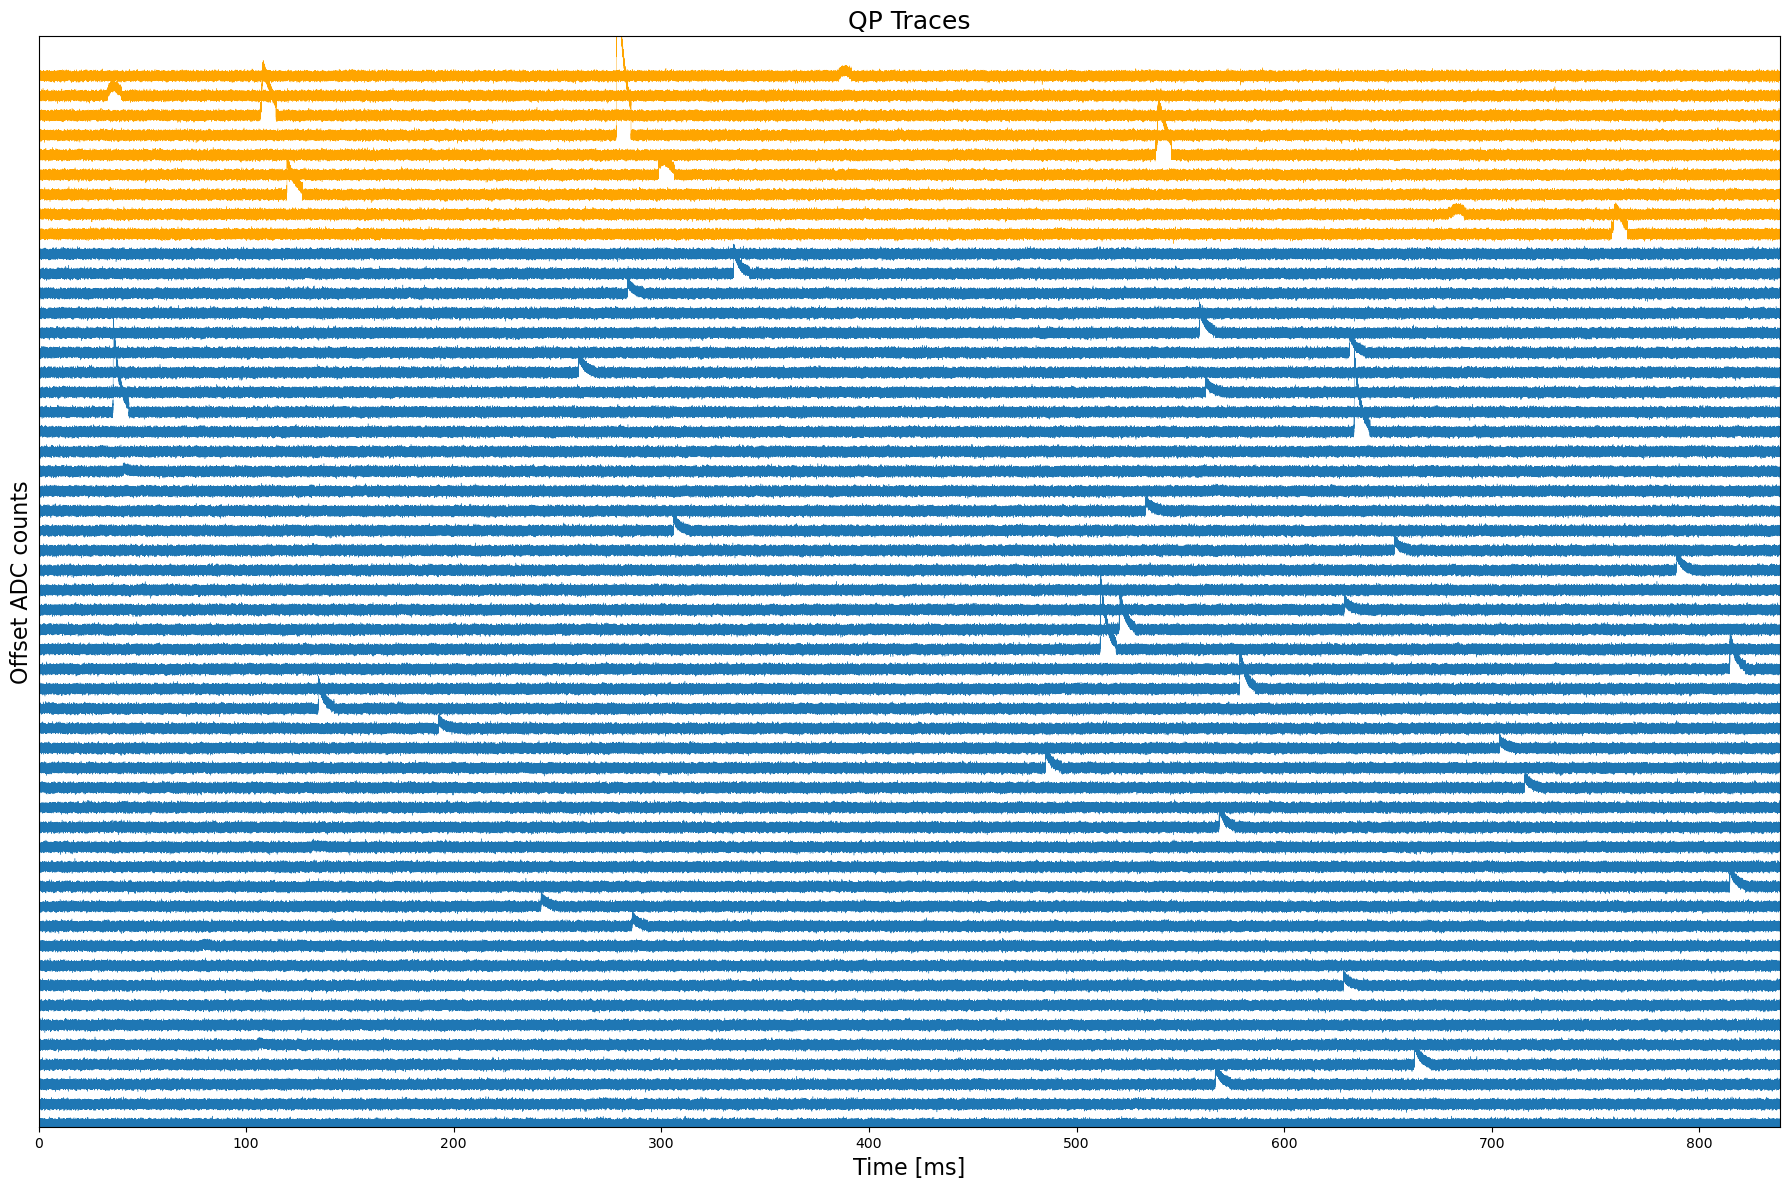

In [61]:
plot_traces(trace)

In [5]:
sub_sum.shape

(3276800,)